# Positive-Negative

In [1]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


## Import Dataset

In [8]:
import pandas as pd

data = pd.read_csv("/content/MyDrive/MyDrive/IMDB_Dataset.csv", engine = "python", error_bad_lines=False)
data.columns = ["Reviews", "Target"]
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 47480: unexpected end of data


,Reviews,Target
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
data.Target.value_counts()

negative    23742
positive    23736
Name: Target, dtype: int64

In [10]:
dictionary = {0:"Bad_Review",
              1:"Good_Review"}

In [11]:
import random

random_index = random.randint(0,len(data)-5)
for row in data[["Reviews", "Target"]][random_index:random_index+5].itertuples():
  _, text , target = row
  print(f'Target: {target} ')
  print(f'Text:\t{text}\n')
  print("---\n")

Target: negative 
Text:	no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!

---

Target: negative 
Text:	I really do fail to see the actual surplus value of this movie. It's not bad enough to be hilarious. There's no sleaze or gratuitous nudity (although there was plenty of opportunity). There's no gore. There's no suspense in the first hour of the movie 'cause there's way to much scenes of tourist having a party and natives playing funky tribal music. That last part was actually funny on many occasions: You see these natives hitting congas and 'jembés' and that's indeed what you hear (badly synchronized) on the soundtrack. But they also added this funky bass-line on the soundtrack. So, where was the bass-player? At one point the natives get angry and start killing the tourists. Why all of the sudden? It's supposed to be because the evil white men build this tourist complex, which according to their myth awakened the wrath of the river-alliga

## Clear Sentences

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
data["Target"] = le.fit_transform(data["Target"])
data.head()

,Reviews,Target
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
import tensorflow as tf
def tf_lower_and_split_punct(text):
  # Split accecented characters.
  # text = text.normalize_utf8_with_offsets_map(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace remove the space from the begining and end.
  text = tf.strings.strip(text)
  return text

In [14]:
print(tf_lower_and_split_punct(data['Reviews'][0]).numpy().decode())

one of the other reviewers has mentioned that after watching just  oz episode youll be hooked .  they are right ,  as this is exactly what happened with me . br br the first thing that struck me about oz was its brutality and unflinching scenes of violence ,  which set in right from the word go .  trust me ,  this is not a show for the faint hearted or timid .  this show pulls no punches with regards to drugs ,  sex or violence .  its is hardcore ,  in the classic use of the word . br br it is called oz as that is the nickname given to the oswald maximum security state penitentary .  it focuses mainly on emerald city ,  an experimental section of the prison where all the cells have glass fronts and face inwards ,  so privacy is not high on the agenda .  em city is home to many .  . aryans ,  muslims ,  gangstas ,  latinos ,  christians ,  italians ,  irish and more .  .  .  . so scuffles ,  death stares ,  dodgy dealings and shady agreements are never far away . br br i would say the m

In [15]:
from sklearn.model_selection import train_test_split

train_sentences,val_sentences,train_labels,val_labels = train_test_split(data['Reviews'].to_numpy(),
                                                                         data['Target'].to_numpy(),
                                                                         test_size=0.2,
                                                                         random_state=42)
print(len(train_sentences),len(val_sentences))

37982 9496


In [16]:
train_sentences[0]

'There is a difference between a "film," and a "movie." A film, regardless of quality, is ready for public consumption. A movie is what a group of friends gets together to make over the course of a weekend with a camcorder. In my time as a viewer, I have seen may examples of both.<br /><br />On September 19, I attended a screening of writer/director Jon Satejowski\'s "Donnybrook." Now having read the script and having seen two different cuts (a rough cut and the "finished" product) of this piece, I can safely say it is a movie. And a student movie, at that. It is, for lack of a better word, competent, which is to say, the director knew how to push record on a camera and capture moving images. The visuals are, for the most part, static and unimpressive, and dialog scenes are reduced to mostly long shots, with little to no close up shots to allow the audience to establish a relationship with the characters. I understand that this is a modestly budgeted film, but some visual flair would h

## Text_Vectorization

In [17]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorization = TextVectorization(max_tokens=None,
                                       standardize=tf_lower_and_split_punct,
                                       split='whitespace',
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=None)

In [18]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences)) 

232

In [19]:
max_vocab_length = 100000
max_length = 232

text_vectorization = TextVectorization(max_tokens = max_vocab_length,
                                       output_mode='int',
                                       output_sequence_length = 232,
                                       )

In [20]:
text_vectorization.adapt(train_sentences)

In [21]:
text_vectorization([train_sentences[0]])

<tf.Tensor: shape=(1, 232), dtype=int64, numpy=
array([[   48,     7,     4,  1457,   199,     4,    20,     3,     4,
           18,     4,    20,  2823,     5,   491,     7,  1523,    17,
         1056, 14028,     4,    18,     7,    49,     4,   519,     5,
          331,   204,   297,     6,    95,   127,     2,   259,     5,
            4,  2456,    16,     4,  5844,     8,    54,    60,    15,
            4,   523,    10,    26,   107,   197,  2767,     5, 16529,
           13,    21,  6093,  6561,    10,  6441,     4,  2808,     5,
         2662,  3082, 91851, 51970,   147,   256,   329,     2,   232,
            3,   256,   107,   110,   272,  1910,     4,  2667,   630,
            3,     2,  1807,  2138,     5,    11,   401,    10,    67,
         6693,   131,     9,     7,     4,    18,     3,     4,  1486,
           18,    31,    12,     9,     7,    17,   557,     5,     4,
          125,   677,  3168,    62,     7,     6,   131,     2,   172,
          676,    86,     6, 

In [22]:
word_in_vocab = text_vectorization.get_vocabulary()
print(len(word_in_vocab))

100000


## Tokenizer

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 100000)
tokenizer.fit_on_texts(train_sentences)

train_seq = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(val_sentences)
test_padded = pad_sequences(test_seq)

In [24]:
train_padded[0]

array([   0,    0,    0, ..., 1683,    5,  103], dtype=int32)

# Embeddings

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 512,
                             input_length = max_length)
embedding

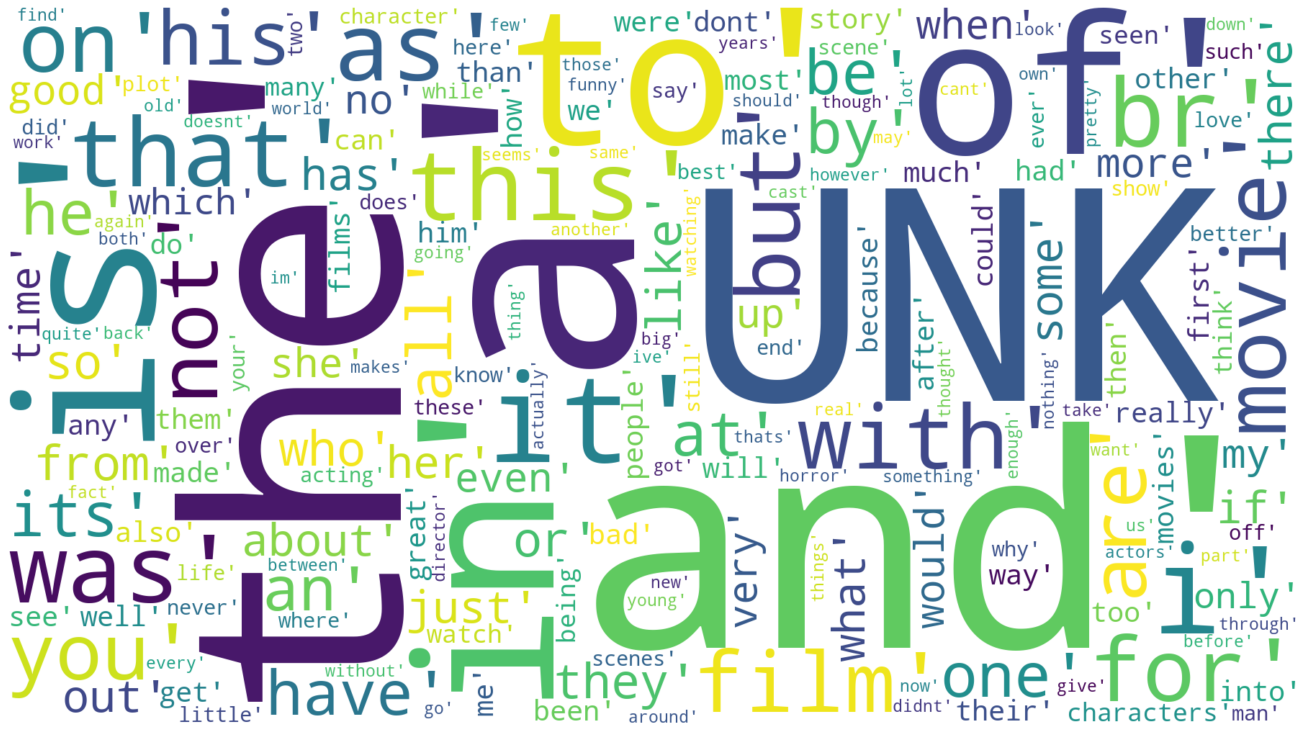

In [26]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

word_cloud = WordCloud(width=1800, height=1000, background_color='white').generate(str(word_in_vocab[:2000]))
fig = plt.figure(figsize = (30,10),facecolor = 'white')
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
# plt.title('Top 2000 Most Common Words', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

# Bi-directional LSTM

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(100000, 512),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences = True)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 512)         51200000  
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        295424    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               7

In [28]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'],run_eagerly=True)

In [ ]:
history = model.fit(train_padded,
                    train_labels,
                    epochs=1,
                    validation_data = (test_padded,val_labels),
                    )

1187/1187 [==============================] - 322s 269ms/step - loss: 0.3784 - accuracy: 0.8371 - val_loss: 0.2651 - val_accuracy: 0.9001


In [29]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/MyDrive/MyDrive/my_model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 512)         51200000  
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 128)        295424    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_7 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_8 (Bidirectio  (None, 512)             

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
def evaluation_function(y_preds,y_true):
  accuracy = accuracy_score(y_true,y_preds)*100
  precision = precision_score(y_true,y_preds,average = 'binary')*100
  recall = recall_score(y_true,y_preds,average = 'binary')*100
  f1 = f1_score(y_true,y_preds,average = 'binary')*100
  confusion_metrics=confusion_matrix(y_true,y_preds)*100

  d={"Accuracy":accuracy,
     "Precision":precision,
     "Recall":recall,
     "F1-Score":f1}
    #  "Confusion_Metrics: ":confusion_metrics}

  return d

In [31]:
prob = model.predict(test_padded)
pred = tf.round(prob)
print(prob[:10],pred[:10])

297/297 [==============================] - 72s 220ms/step
[[0.01714279]
 [0.01319298]
 [0.9996681 ]
 [0.08963228]
 [0.518889  ]
 [0.9984736 ]
 [0.99968886]
 [0.9941797 ]
 [0.99951994]
 [0.15917765]] tf.Tensor(
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]], shape=(10, 1), dtype=float32)


In [39]:
model_results = evaluation_function(val_labels,pred)
model_results

{'Accuracy': 88.50042122999157,
 'Precision': 91.57960718763059,
 'Recall': 86.41561514195584,
 'F1-Score': 88.92270237370663}

In [40]:
from sklearn.metrics import classification_report

print(classification_report(val_labels,pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4710
           1       0.86      0.92      0.89      4786

    accuracy                           0.89      9496
   macro avg       0.89      0.88      0.88      9496
weighted avg       0.89      0.89      0.88      9496



In [34]:
dictionary = {0:"Bad_Review",
              1:"Good_Review"}

In [ ]:
def predict_sentiment(text):
    tw = tf_lower_and_split_punct(text)
    # seq = tokenizer.texts_to_sequences([tw])
    # pad = pad_sequences(seq)
    pad = text_vectorization([tw])
    prob = model.predict(pad)
    print(prob)
    prediction = int(tf.round(prob))
    print("Predicted label: ", dictionary[prediction])
    return prediction
# test_sentence1 = "it was a good Movie"
# predict_sentiment(test_sentence1)

In [ ]:
arr = ["Spent an evening at a special screening of #SalaamVenky on invitation of the film's screenwriter, Sammeer Arora. A brilliantly written movie that raises an important question, this one is an immersive experience to be watched in the theaters.", 
 "Watched #AnActionHero It's the best comedy and action movie among all I watched recently. @ayushmannk is superb as usual in his role. The story starts, progresses, and ends well without disappointing you. A really good entertaining watch."]

a = []
for i in range(len(arr)):
  p = predict_sentiment(arr[i])
  a.append(p)

1/1 [==============================] - 0s 29ms/step
[[0.46458623]]
Predicted label:  Bad_Review
1/1 [==============================] - 0s 29ms/step
[[0.47633585]]
Predicted label:  Bad_Review


<BarContainer object of 2 artists>

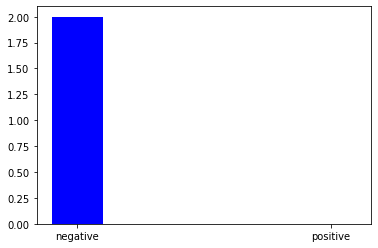

In [ ]:
import matplotlib.pyplot as plt
z = a.count(0)
z2 = a.count(1)
b = [z, z2]
plt.bar(["negative", "positive"], b, color = "blue", width = 0.2)

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt

class TwitterClient(object):

	def __init__(self):

		# keys and tokens from the Twitter Dev Console
		consumer_key = 'M08aoqzIsagIGdExvYvHqjZl8'
		consumer_secret = 'Xj4VF8mOh6xuGS1s2NUwXyFRAnECcpUo2DNQUUY5kq7MUh2YX6'
		access_token = '1380466889718042624-8Kq26681ot7DKfWFbQLESsrzph9PsA'
		access_token_secret = 'Zj6rxBN48jOM8ZPr5v8gADFFL6DeImE3DvcVbKhKitWa5'

		# attempt authentication
		try:
			# create OAuthHandler object
			self.auth = OAuthHandler(consumer_key, consumer_secret)
			# set access token and secret
			self.auth.set_access_token(access_token, access_token_secret)
			# create tweepy API object to fetch tweets
			self.api = tweepy.API(self.auth)
		except:
			print("Error: Authentication Failed")

	def clean_tweet(self, tweet):

		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

	def get_tweet_sentiment(self, tweet):

		# create TextBlob object of passed tweet text
		analysis = TextBlob(self.clean_tweet(tweet))
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'

	def get_tweets(self, query, count = 10):

		# empty list to store parsed tweets
		tweets = []
		try:
			# call twitter api to fetch tweets
			fetched_tweets = self.api.search(q = query, count = count)

			# parsing tweets one by one
			for tweet in fetched_tweets:
				# empty dictionary to store required params of a tweet
				parsed_tweet = {}

				# saving text of tweet
				parsed_tweet['text'] = tweet.text
				# saving sentiment of tweet
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

				# appending parsed tweet to tweets list
				if tweet.retweet_count > 0:
					# if tweet has retweets, ensure that it is appended only once
					if parsed_tweet not in tweets:
						tweets.append(parsed_tweet)
				else:
					tweets.append(parsed_tweet)

			# return parsed tweets
			return tweets

		except tweepy.TweepError as e:
			# print error (if any)
			print("Error : " + str(e))

def main():
  
	api = TwitterClient()
	
	tweets = api.get_tweets(query = "Drishyam 2", count = 300)
 
	ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']

	ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']

	print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))

	print("Neutral tweets percentage: {} %".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

	print("\n\nPositive tweets:")
	for tweet in ptweets[:10]:
		print(tweet['text'])

	print("\n\nNegative tweets:")
	for tweet in ntweets[:10]:
		print(tweet['text'])

if __name__ == "__main__":
	main()

Negative tweets percentage: 81.81818181818181 %
Neutral tweets percentage: 9.090909090909092 %


Positive tweets:
RT @mayanja_jp: 3 idiots might be the best Indian movie ever
@shorter_than_SM i only watched one. since they saying they are important films, gonna binge watch his movies. 
😂lm… https://t.co/bfWDUks4He
RT @DefiyantlyFree: Republicans are gutless and spineless but hey what else is new. They reached a deal on a full year omnibus bill which w…
PSA: Masks were worn for style BEFORE Covid. Just in case some of you weren't aware, you could go to an Anime Conve… https://t.co/VHguzdIfe5


Negative tweets:
RT @Highway_30: This is who you idiots voted for. I’m sorry to be so blunt, but there is no other way. Klaus Schwab! Wake tf up and do 3 cl…
RT @moemicky18: One day i will disappear like Aamir Khan from 3 idiots without telling anyone.
Like 90% of NHL highlights, it's 3 guys looking like idiots, an interference penalty that wasn't called and a goali… https://t.co/UF70sWGdnk
@Realg